## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn

sys.path.insert(0, '../../Utils')

import models
from train import *
from metrics import * 

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 150
batch_size = 128
lr = 0.01

## Load CIFAR10

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


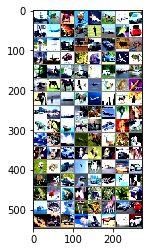

In [3]:
# define series of transforms to pre process images 
transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#     torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
    
    

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# load training set 
cifar10_trainset = torchvision.datasets.CIFAR10('../datasets/', train=True, transform=transform, download=True)
cifar10_trainloader = torch.utils.data.DataLoader(cifar10_trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# load test set 
cifar10_testset = torchvision.datasets.CIFAR10('../datasets/', train=False, transform=transform, download=True)
cifar10_testloader = torch.utils.data.DataLoader(cifar10_testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(cifar10_trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

## Model Architecture

In [4]:
# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


multi_layer_perceptron = models.cnn(3, 10, 64)


# load the torchvision resnet18 implementation 
resnet18 = torchvision.models.resnet18(num_classes=10)
# resnet fix for cifar10 image size 
resnet18.avgpool = nn.AvgPool2d(2, stride=1)

#alexnet = torchvision.models.alexnet()


vgg16 = torchvision.models.vgg16(num_classes=10)#,init_weights=True)
# vgg16 fix for cifar10 image size 
vgg16.classifier = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, 10),
        )
#squeezenet = torchvision.models.squeezenet1_0()
#densenet = torchvision.models.densenet161()
#inception = torchvision.models.inception_v3(num_classes=10)

#net = resnet18.to(device)
net = vgg16.to(device)
#net = multi_layer_perceptron.to(device) #some size mismatch issue
net.apply(models.weights_init)

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)
# optimizer = optim.Adam(net.parameters(), lr=lr)

## Training 

In [5]:
train(net, cifar10_trainloader, cifar10_testloader, optimizer, criterion, n_epochs, classes=classes)

[0/150]
Accuracy of airplane : 0.40 %
Accuracy of automobile : 57.50 %
Accuracy of bird : 3.40 %
Accuracy of cat : 38.10 %
Accuracy of deer : 0.00 %
Accuracy of dog : 3.10 %
Accuracy of frog : 34.70 %
Accuracy of horse : 45.20 %
Accuracy of ship : 50.80 %
Accuracy of truck : 41.90 %

Total accuracy = 27.51 %


[1/150]
Accuracy of airplane : 59.80 %
Accuracy of automobile : 51.60 %
Accuracy of bird : 19.50 %
Accuracy of cat : 9.10 %
Accuracy of deer : 17.90 %
Accuracy of dog : 39.70 %
Accuracy of frog : 75.30 %
Accuracy of horse : 40.90 %
Accuracy of ship : 33.60 %
Accuracy of truck : 33.50 %

Total accuracy = 38.09 %




Process Process-12:
Process Process-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", lin

KeyboardInterrupt: 

## Saving

In [ ]:
from torchvision import models
from torchvision import transforms, utils
from scipy import ndimage, misc

from PIL import Image, ImageFilter, ImageChops
import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable

page=Image.fromarray(np.uint8(np.random.random((32,32,3))*255))
plt.imshow(page)
print(np.mean(page))


In [ ]:
def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.title("Image loaded successfully")
    return image

normalise = transforms.Normalize(
    mean=[0.4914, 0.4822, 0.4465],
    std=[0.2023, 0.1994, 0.2010]
    )

preprocess = transforms.Compose([
     transforms.Resize((32,32)),
    transforms.ToTensor(),
    normalise
    ])

def deprocess(image):
    return image * torch.Tensor([0.229, 0.224, 0.225]).cuda()  + torch.Tensor([0.485, 0.456, 0.406]).cuda()

In [ ]:
alpha_reg_alpha = 6
def dd_helper(image, net, iterations, lr,category):        
    
    input = Variable(preprocess(image).unsqueeze(0).cuda(), requires_grad=True)
    net.zero_grad()
    for i in range(iterations):
        out = net(input)
        reg_alpha = alpha_norm(input, alpha_reg_alpha)/1000
        loss= out.take(category)-reg_alpha

        loss.backward()
        input.data = input.data + lr * input.grad.data
        input.grad.zero_()
    input = input.data.squeeze()
    input.transpose_(0,1)
    input.transpose_(1,2)
    input = np.clip(deprocess(input), 0, 1)
    im = Image.fromarray(np.uint8(input*255))
    return im

In [ ]:
def deep_dream_vgg(image, net, iterations, lr, octave_scale, num_octaves,category):
    net.eval()
    category = Variable(torch.cuda.LongTensor([category]))
    if num_octaves>0:
        image1 = image.filter(ImageFilter.GaussianBlur(2))
        if(image1.size[0]/octave_scale < 1 or image1.size[1]/octave_scale<1):
            size = image1.size
        else:
            size = (int(image1.size[0]/octave_scale), int(image1.size[1]/octave_scale))
#         print(size)
        image1 = image1.resize(size,Image.ANTIALIAS)
        image1 = deep_dream_vgg(image1, net, iterations, lr, octave_scale, num_octaves-1,category)
        size = (image.size[0], image.size[1])
        image1 = image1.resize(size,Image.ANTIALIAS)
        image = ImageChops.blend(image, image1, 0.6)
#     print("-------------- Recursive level: ", num_octaves, '--------------')
    img_result = dd_helper(image, net, iterations, lr,category)
    img_result = img_result.resize(image.size)
    plt.imshow(img_result)
    return img_result

def data_extraction(image, net, iterations, lr, octave_scale, num_octaves,category):
    for j in range(iterations):
        image= deep_dream_vgg(image, net, 32, lr, octave_scale, num_octaves,category)
        image = image.filter(ImageFilter.BoxBlur(1))
        print("iteration [%d/%d]" %(j, iterations))
    return image
    
def alpha_norm(input_matrix, alpha):
        """
            Converts matrix to vector then calculates the alpha norm
        """
        alpha_norm = ((input_matrix.view(-1))**alpha).sum()
        return alpha_norm

In [ ]:
vgg = torch.load('/home/fmejia/fmejia/Cypercat/cyphercat/baselines/CIFAR_VGG.pt')

dream=data_extraction(page,vgg,150,.01,2,20,5)
plt.imshow(dream)